# PMDS FoML 2022 Final Exam

Good morning and happy New Year's Eve!

You have **2.5 hours** to complete today's exam. When finished, you should output a PDF file and
upload to Google Classroom.

There are two types of questions, "Short answer" and "Coding." You might
want to answer the short answer questions and easy coding questions first then come back
to the more difficult ones. Try to answer every question as best you can. I give partial credit!

Good luck!

In [174]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import torch
import torchvision

## Question 1 (Short answer, 10 points)

In linear regression, we assume that the target variable $y$ is distributed according to a normal
distribution with mean $\mathbf{\theta}^T \mathbf{x}$ and variance $\sigma^2$.

Why is it that the optimal parameters
$$\mathbf{\theta}^* = \underset{\mathbf{\theta}}{\operatorname{argmax}}
\prod_{i=1}^m p(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{\theta})$$
only involve the coefficients $\theta_0, \theta_1, \ldots$
applied to $\mathbf{x}$ and do not depend on $\sigma$?

*Write your answer here.*

In linear regression, the optimal parameters only involve the coefficients $\theta_0, \theta_1, \ldots$
applied to $\mathbf{x}$ and do not depend on $\sigma$ 


**Because:**
1. the cost function is:
$$\mathcal{J}_{\theta} = \frac{1}{2} \sum_{i=1}^{m}\left( h_\theta(\mathbf{x}^{(i)})- y^{(i)}\right)$$
do not depend on $\sigma$.

2. the parameters 𝜃 that maximize the likelihood given by:

$$ p(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{\theta}) = \prod_{i=1}^m \frac{1}{ \sqrt{2 \pi \sigma^2}}e^{\frac{-(y^{(i)}-\theta^T x^{(i)})^2}{2}\sigma^2}
$$
Where $\sigma^2$ assumed to be constant.

## Question 2 (Coding, 20 points)

Consider the dataset in the file `final-data.csv`. It is the same binary classification
dataset you used in the midterm quiz, with two real-valued features $x_1$ and $x_2$ and
a target $y \in \{-1, 1\}$.

In the cell below, write code to read the CSV file as a numpy array, split the data into training and
validation **randomly** with a ratio of 80% training and 20% validation, and plot the data in two plots,
one for the training data and one for the validation data. The two classes should be shown in
different colors in the two plots.


In [175]:
# Reading, splitting, and plotting code goes here

# Read the data file
df = pd.read_csv('final-data.csv',header=None)
df.head()

,0,1,2
0,1.818172,0.391324,-1.0
1,11.338493,10.811217,-1.0
2,8.801390,11.454011,-1.0
3,8.579099,10.817820,-1.0
4,3.216192,5.463256,-1.0


In [186]:
X1 = df.loc[:,0].to_numpy().reshape(-1,1)
X2 = df.loc[:,1].to_numpy().reshape(-1,1)
X = np.concatenate((X1,X2),1)
y = df.loc[:,2].to_numpy().reshape(-1,1)

In [187]:
# Split the data
def train_val_split(X,y,train_size):
    m = X.shape[0]
    order = np.arange(m)
    np.random.shuffle(order)
    train_len = int(m*train_size)
    train_in = order[:train_len]
    val_in = order[train_len:]
    X_train = X[train_in,:]
    y_train = y[train_in,:]
    X_val = X[val_in,:]
    y_val = y[val_in,:]
    return X_train,y_train,X_val,y_val
X_train,y_train,X_val,y_val = train_val_split(X,y,0.8)

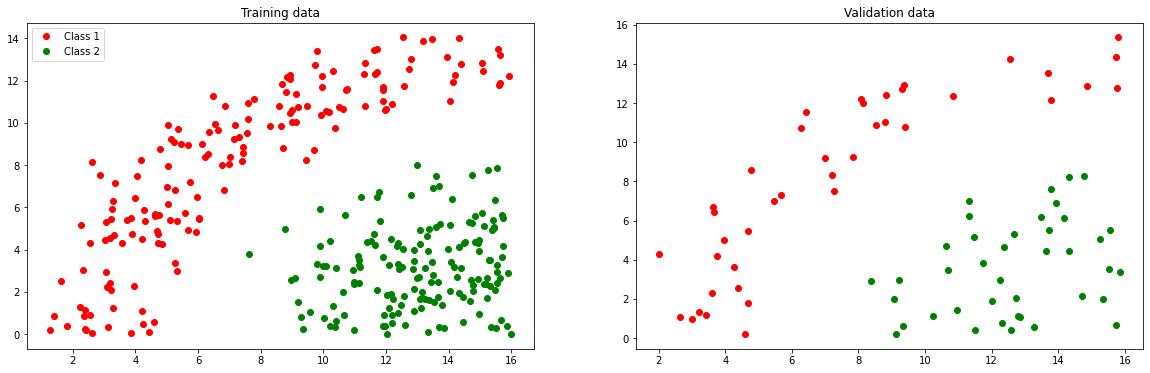

In [178]:
#Plot the data
matplotlib.rcParams['figure.figsize'] = [20,6]
fig,(ax1,ax2) = plt.subplots(1,2)

#Trainng data
ax1.set_title('Training data')
ax1.plot(X_train[y_train.reshape(-1)==-1,0],X_train[y_train.reshape(-1)==-1,1],'ro',label='Class 1')
ax1.plot(X_train[y_train.reshape(-1)==1,0],X_train[y_train.reshape(-1)==1,1],'go',label='Class 2')
ax1.legend()

# Validationdata
ax2.set_title('Validation data')
ax2.plot(X_val[y_val.reshape(-1)==-1,0],X_val[y_val.reshape(-1)==-1,1],'ro',label='Class 1')
ax2.plot(X_val[y_val.reshape(-1)==1,0],X_val[y_val.reshape(-1)==1,1],'go',label='Class 2')
ax1.legend()

plt.show()

## Question 3 (Coding, 10 points)

Since the data in Question 2 are not linearly separable, we would need a nonlinear classifier
such as a RBF SVM or a neural network.

In the cell below, write code to calculate the Gram matrix (kernel matrix) $\mathtt{K}$ for
the Gaussian/RBF kernel with $\sigma=1.0$.


In [179]:
# Code to calculate K goes here
def rbf_kernel (X,sigma):
    m = X.shape[0]
    K = np.zeros((m,m))
    for i in range (m):
        for j in range (m):
            K[i,j] = (X[i,:]-X[j,:])@(X[i,:]-X[j,:])
    K = np.exp(-K/(2*sigma**2))
    return K
K = rbf_kernel (X,sigma=1.0)
K

array([[1.00000000e+00, 5.52010667e-44, 6.84859985e-38, ...,
        5.77268892e-13, 8.34556166e-16, 1.80902204e-46],
       [5.52010667e-44, 1.00000000e+00, 3.25480324e-02, ...,
        4.22942289e-24, 1.56354076e-09, 1.11840355e-10],
       [6.84859985e-38, 3.25480324e-02, 1.00000000e+00, ...,
        3.31160803e-26, 8.08709148e-10, 3.50473756e-18],
       ...,
       [5.77268892e-13, 4.22942289e-24, 3.31160803e-26, ...,
        1.00000000e+00, 6.71526442e-05, 8.23991877e-14],
       [8.34556166e-16, 1.56354076e-09, 8.08709148e-10, ...,
        6.71526442e-05, 1.00000000e+00, 2.10625401e-10],
       [1.80902204e-46, 1.11840355e-10, 3.50473756e-18, ...,
        8.23991877e-14, 2.10625401e-10, 1.00000000e+00]])

## Question 4 (Short answer, 10 points)

Suppose that the data in Question 2 were not labeled and the goal was to cluster them.
Which clustering method, k-means or the GMM, would be better suited to this dataset?

*Write your answer here.*

Beacuse the K-Means Clustering classifies samples based on the distance between sample and the centroid so that oes not work efficiently with complex geometrical shaped data(Non-Linear). Otherwise, GMM uses probability of a sample to determine the feasibility of it belonging to a cluster so it works well with non-linear geometric distributions as well

**With the data in Question 2 GMM would be better**

## Question 5 (Short answer, 10 points)

If you were to design a neural network to classify the data from Question 2, what would be
the structure of the network (number of layers, number of units, activation functions, etc.)?

*Write your answer here.*

The data in Question 2 is quite simple. So the structure of neural network propose is:

- Input layer with two inputs
- 01 hidden layer 4 units with ReLU activation function
- Output layer with a single output, with sigmoid activation function
- Binary cross entropy loss function, and Stochastic gradient descent for the optimizer.

## Question 6 (Coding, 10 points)

Implement the neural network you described in Question 5 using PyTorch.
You only need to provide the Python class inheriting from `torch.nn.Module` here.

In [180]:
import torch

# Classification network
class Network(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,4)
        self.fc2 = torch.nn.Linear(4,1)
    
    def forward(self,x):
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        x = torch.nn.functional.sigmoid(x)
        return x
    pass

In [181]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
class dataset():
    def __init__(self,X,y,transform=None):
        self.inputs = X
        self.labels = y
        self.transform = transform
    
    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self,index):
        inputs = self.transform(self.inputs)
        labels = self.transform(self.labels)
        return inputs.float(), labels.float()

## Question 7 (Coding, 20 points)

Write a function `train()` using the template below to train the neural network
from Question 6 for a given number of epochs and demonstrate that it is working
correctly by plotting the training and validation loss over the training process.


In [182]:
# Set up data loaders
train_data = dataset(X_train,y_train,transform)
val_data = dataset(X_val,y_val,transform)
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data,batch_size =batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data,batch_size =batch_size,shuffle=False)

In [183]:
# Network training function

def train(net, epochs,  train_data,  val_data, alpha):
    
    train_loss = []
    val_loss = []
           
    # Train for "epochs" epochs
    for epoch in tqdm(range(epochs),desc='Progress bar'):
        net.train()
        epoch_loss = 0
        iters = 0
        for i,(input,target) in enumerate(train_loader):
            #if torch.cuda.is_available():
                #input = input.cuda()
                #target = target.cuda()
            optimizer.zero_grad()
            # Forward pass
            output = net(input)
            loss = criterion(output, target)
            # Backward
            loss.backward()
            # Update weight
            optimizer.step()
            # Record training loss
            epoch_loss += loss.item()
            iters += 1
            
        train_loss.append(epoch_loss/iters)

    # Return training and validation loss
        net.eval()
        epoch_loss = 0
        iters = 0
        for i,(input,target) in enumerate(val_loader):
            #if torch.cuda.is_available():
                #input = input.cuda()
                #target = target.cuda()
            optimizer.zero_grad() 
        # Forward pass
            output = net(input)
            loss = criterion(output, target)
        # Record validation loss
            epoch_loss += loss.item()
            iters += 1
    
        val_loss.append(epoch_loss/iters)

    
    return train_loss, val_loss


net = Network()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
#if torch.cuda.is_available:
    #net = net.cuda()

X_train = None
X_val = None
y_train = None
y_val = None

train_loss, val_loss = train(net, 1000,  train_data,  val_data, 0.01)

Progress bar:   0%|          | 0/1000 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


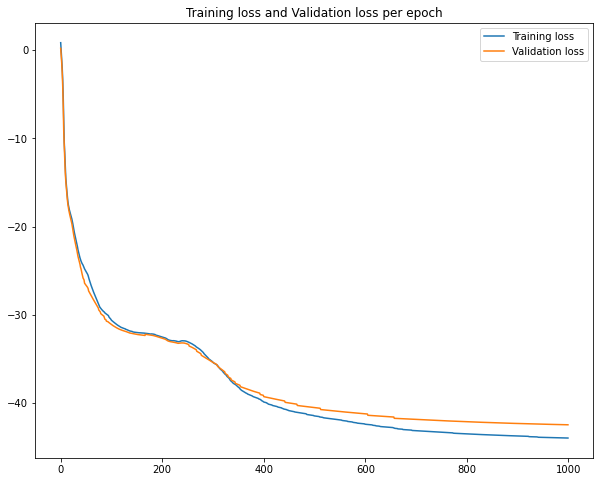

In [184]:
# Plot train_loss, val_loss
fig = plt.figure(figsize=(10,8))
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training loss and Validation loss per epoch')
plt.legend()
plt.show()

## Question 8 (Coding, 10 points)

Write a function `predict()` using the template below that runs inference
using the trained network from Question 7 on a test/validation set.

In [188]:
y_val1 = y_val.copy()
for y in y_val1:
    y[y==-1]=0

In [189]:
# Inference function

def predict(x):
    x = transform(x).float()
    output = net(x)
    preds = torch.where(output.data>=0.5,1,0)
    return preds.numpy().reshape(-1,1)

def accracy(x,y):
    x = transform(x).float()
    output = net(x)
    preds = torch.where(output.data>=0.5,1,0)
    preds = preds.numpy().reshape(-1,1)
    acc = (preds.reshape(-1) == y.reshape(-1)).sum()/len(y)
    return acc*100

In [190]:
y_pred = predict(X_val)
accuracy = accracy(X_val,y_val1)
print('Validation accuracy: %f' % accuracy)

Validation accuracy: 100.000000


/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


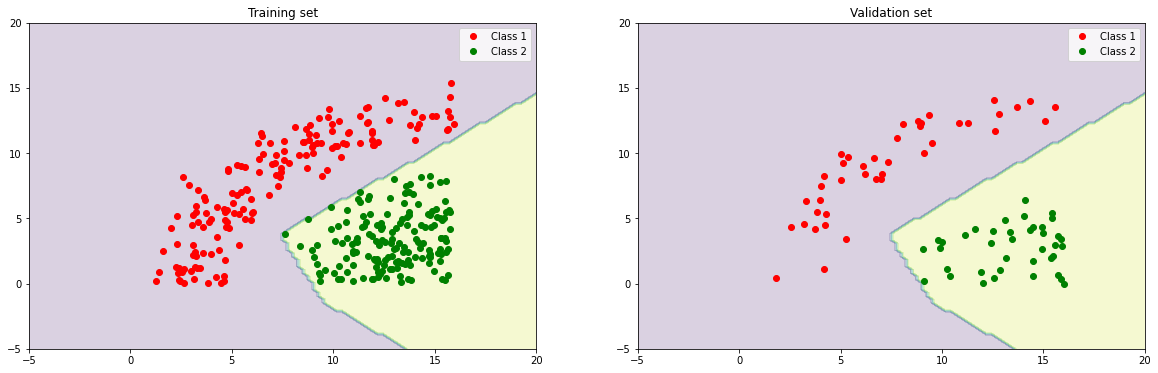

In [191]:
# Plot the result
matplotlib.rcParams['figure.figsize'] = [20,6]
fig,(ax1,ax2) = plt.subplots(1,2)

# Training set
ax1.set_title('Training set')

grid_x,grid_y = np.mgrid[-5:20:100j,-5:20:100j]
grid_xy = np.vstack([grid_x.ravel(),grid_y.ravel()]).T
z = predict(grid_xy).reshape((100,100))
ax1.contourf(grid_x , grid_y, z, alpha = 0.2)

ax1.plot(X_train[y_train.reshape(-1)==-1,0],X_train[y_train.reshape(-1)==-1,1],'ro',label='Class 1')
ax1.plot(X_train[y_train.reshape(-1)==1,0],X_train[y_train.reshape(-1)==1,1],'go',label='Class 2')

ax1.legend()


# Training set
ax2.set_title('Validation set')

grid_x,grid_y = np.mgrid[-5:20:100j,-5:20:100j]
grid_xy = np.vstack([grid_x.ravel(),grid_y.ravel()]).T
z = predict(grid_xy).reshape((100,100))
ax2.contourf(grid_x , grid_y, z, alpha = 0.2)

ax2.plot(X_val[y_val.reshape(-1)==-1,0],X_val[y_val.reshape(-1)==-1,1],'ro',label='Class 1')
ax2.plot(X_val[y_val.reshape(-1)==1,0],X_val[y_val.reshape(-1)==1,1],'go',label='Class 2')

ax2.legend()

plt.show()